In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from pandas_datareader import get_data_yahoo as yahoo
from pandas_datareader.data import YahooOptions as opt
from datetime import datetime as date
import mplfinance as mpl
from fbprophet import Prophet

In [2]:
import statsmodels.api as sm

In [3]:
df = sm.datasets.macrodata.load_pandas().data

In [4]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<AxesSubplot:>

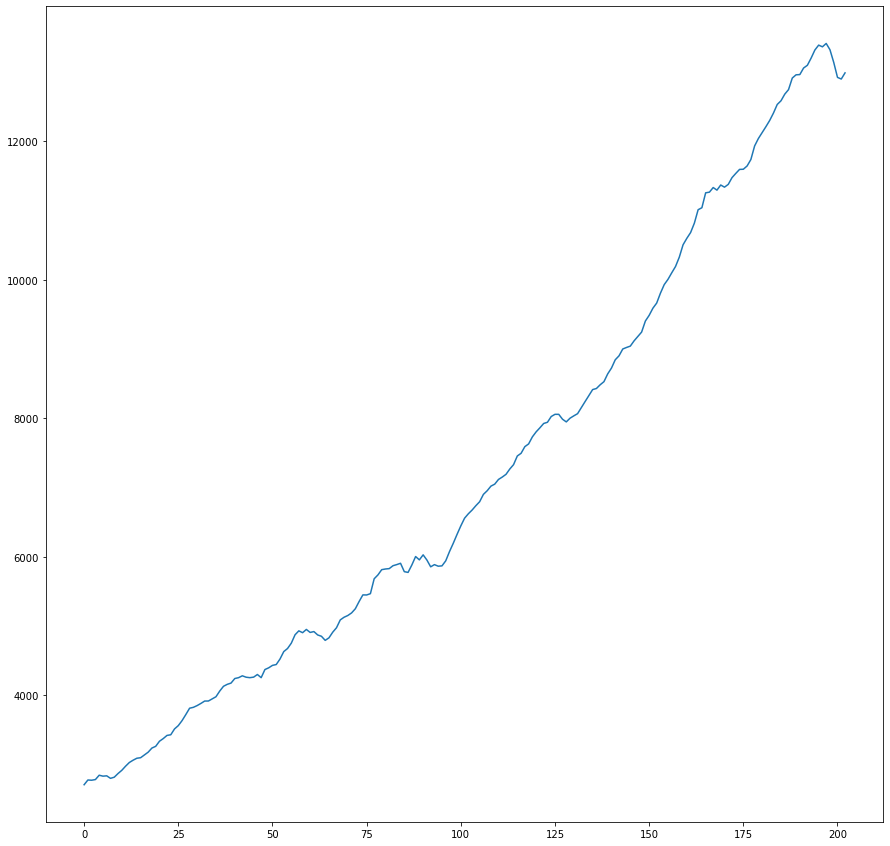

In [5]:
df['realgdp'].plot(figsize=(15,15))

In [6]:
gdpcycle, gdptrend = sm.tsa.filters.hpfilter(df['realgdp'])

In [7]:
df['trend'] = gdptrend

<AxesSubplot:>

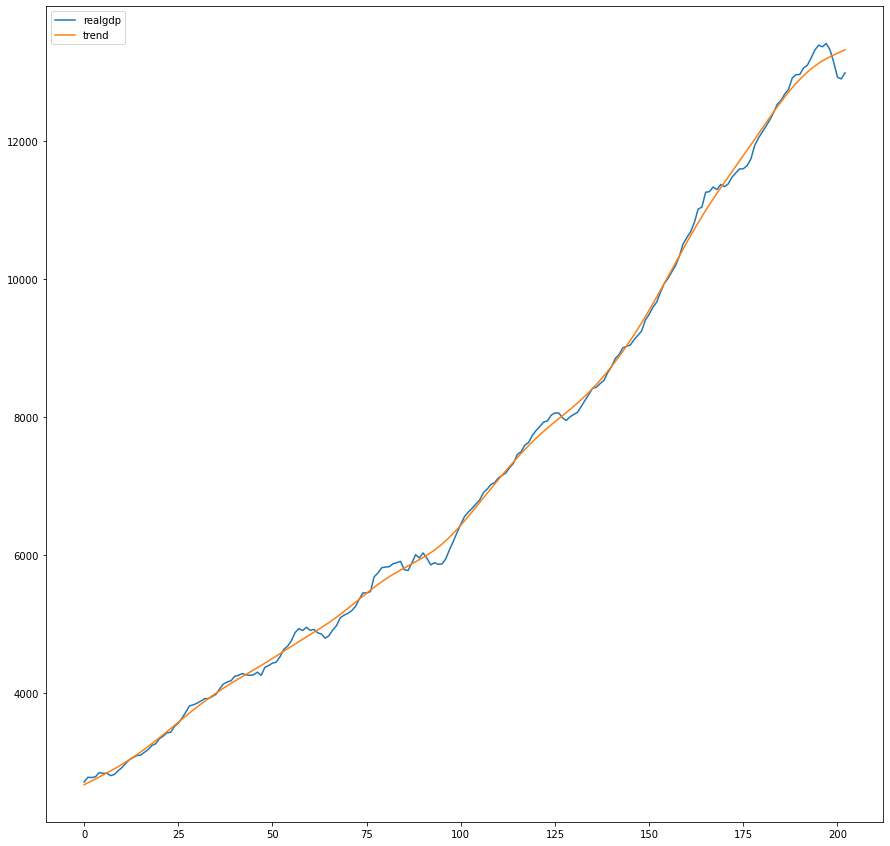

In [8]:
df[['realgdp','trend']].plot(figsize=(15,15))

In [50]:
start = date(2020,5,1)
end = date(2021,5,24)

In [13]:
gof = yahoo('gof',start, end)

In [14]:
gof.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14',
               '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20',
               '2021-05-21', '2021-05-24'],
              dtype='datetime64[ns]', name='Date', length=603, freq=None)

In [15]:
gof['MA6'] = gof['Adj Close'].rolling(window=6).mean()
gof['MA12'] = gof['Adj Close'].rolling(window=12).mean()

In [16]:
gof.tail()

,High,Low,Open,Close,Volume,Adj Close,MA6,MA12
Date,,,,,,,,
2021-05-18,20.330000,20.010000,20.100000,20.049999,230100.0,20.049999,20.437154,20.492401
2021-05-19,20.100000,19.900000,19.940001,20.080000,267800.0,20.080000,20.308000,20.474080
2021-05-20,20.459999,20.030001,20.080000,20.420000,210400.0,20.420000,20.293333,20.442793
2021-05-21,20.709999,20.360001,20.360001,20.639999,206500.0,20.639999,20.310000,20.452967
2021-05-24,20.820000,20.600000,20.600000,20.719999,263300.0,20.719999,20.355000,20.484675


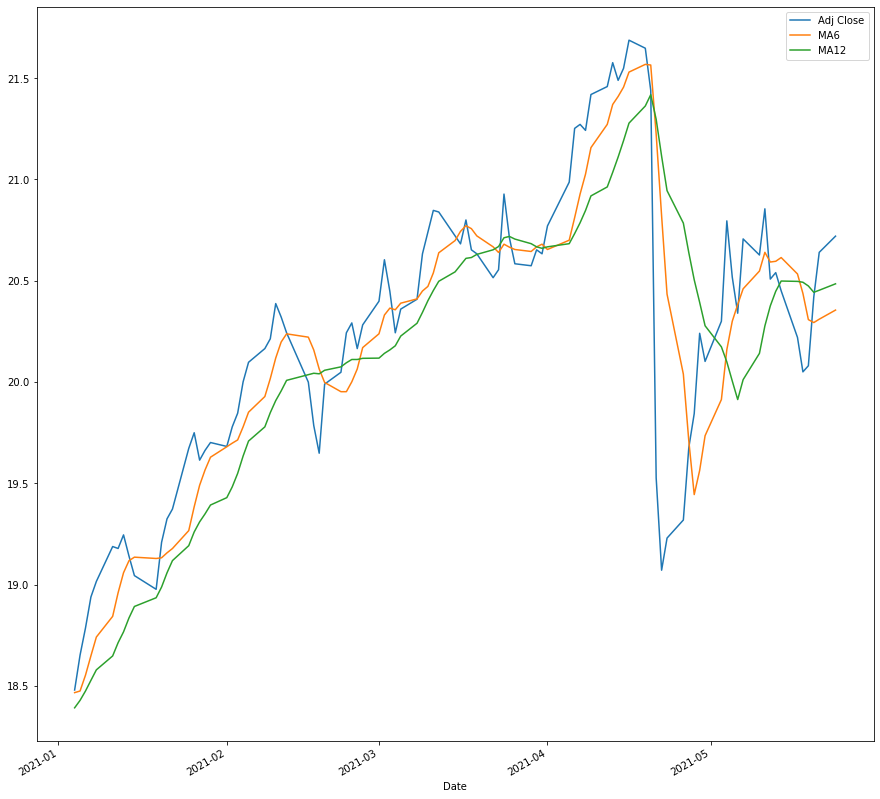

In [17]:
gof[['Adj Close', 'MA6', 'MA12']]['2021-1-1':'2021-05-24'].plot(figsize=(15,15))
plt.legend();

In [18]:
gof['EWMA6'] = gof['Adj Close'].ewm(span=6).mean()
gof['EWMA12'] = gof['Adj Close'].ewm(span=12).mean()

In [19]:
gof.tail()

,High,Low,Open,Close,Volume,Adj Close,MA6,MA12,EWMA6,EWMA12
Date,,,,,,,,,,
2021-05-18,20.330000,20.010000,20.100000,20.049999,230100.0,20.049999,20.437154,20.492401,20.330574,20.388857
2021-05-19,20.100000,19.900000,19.940001,20.080000,267800.0,20.080000,20.308000,20.474080,20.258981,20.341341
2021-05-20,20.459999,20.030001,20.080000,20.420000,210400.0,20.420000,20.293333,20.442793,20.304987,20.353442
2021-05-21,20.709999,20.360001,20.360001,20.639999,206500.0,20.639999,20.310000,20.452967,20.400704,20.397528
2021-05-24,20.820000,20.600000,20.600000,20.719999,263300.0,20.719999,20.355000,20.484675,20.491932,20.447139


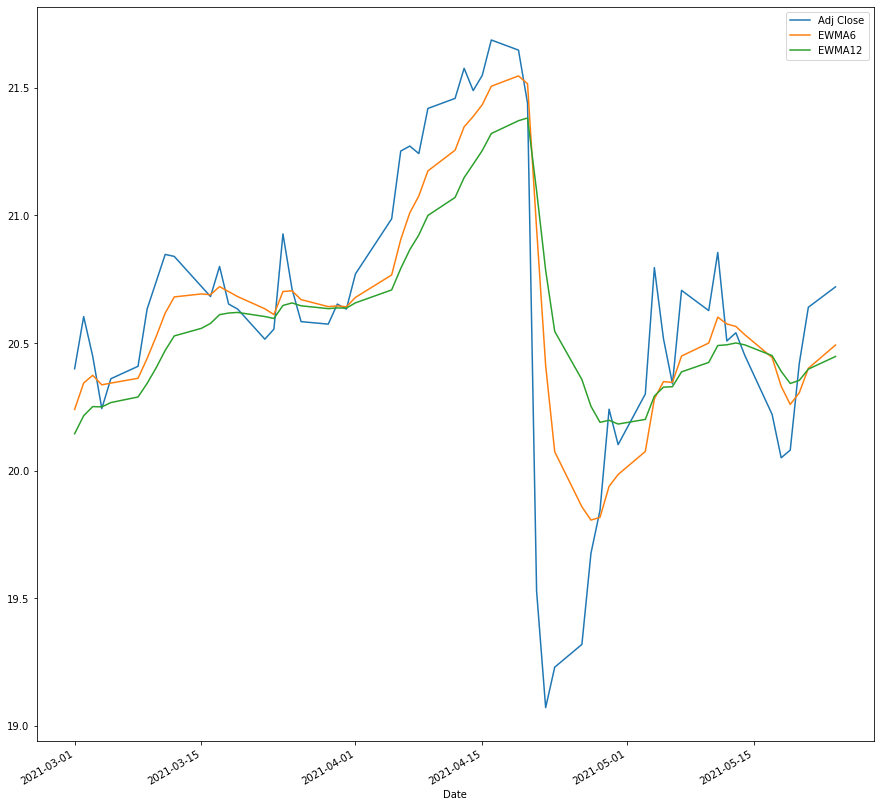

In [20]:
gof[['Adj Close', 'EWMA6', 'EWMA12']]['2021-03-1':'2021-05-24'].plot(figsize=(15,15))
plt.legend();

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [64]:
start = date(2021,5,1)

In [65]:
sq = yahoo('sq',start)

In [66]:
sq

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-03,249.419006,241.789993,246.600006,243.679993,5268800,243.679993
2021-05-04,240.190002,228.619003,238.830002,231.190002,9123600,231.190002
2021-05-05,239.139999,229.800003,237.500000,231.869995,3792900,231.869995
2021-05-06,235.350006,216.699997,235.210007,223.960007,14759100,223.960007
2021-05-07,241.699005,231.179001,240.089996,233.350006,14820100,233.350006
2021-05-10,230.000000,216.009995,229.619995,216.429993,13256900,216.429993
2021-05-11,221.779999,205.690002,205.889999,220.649994,13676100,220.649994
2021-05-12,218.759995,205.600006,215.300003,206.669998,11778300,206.669998
2021-05-13,211.500000,192.289993,208.199997,197.130005,21397100,197.130005


In [67]:
sq['Adj Close'].dropna()

Date
2021-05-03    243.679993
2021-05-04    231.190002
2021-05-05    231.869995
2021-05-06    223.960007
2021-05-07    233.350006
2021-05-10    216.429993
2021-05-11    220.649994
2021-05-12    206.669998
2021-05-13    197.130005
2021-05-14    207.850006
2021-05-17    202.919998
2021-05-18    203.160004
2021-05-19    200.110001
2021-05-20    204.910004
2021-05-21    200.009995
2021-05-24    210.949997
2021-05-25    216.199997
2021-05-26    222.339996
2021-05-27    220.899994
2021-05-28    222.520004
Name: Adj Close, dtype: float64

In [69]:
results = seasonal_decompose(sq['Adj Close'],model='multiplicative')

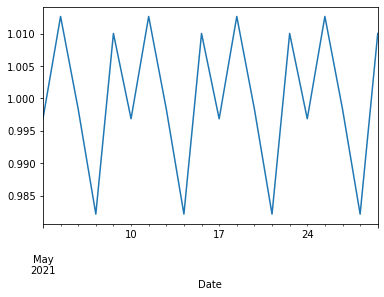

In [70]:
fig = results.seasonal.plot()